In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
data_name_list = ['nki','peptide','amputation','wisconsin','heat','hc','paradox','school','stigma','ef',\
                 'smok','coag','anemia','cervix','mental','dement','septic','coimbra','cryo','somerville',\
                  'hcc','heart','liver','language']
n_data = len(data_name_list)

In [4]:
def plot_fig(t):
    nx,ny = 4,5
    nfig = nx*ny
    fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))

    ij = 0
    for i in range(nx):
        for j in range(ny):    

            data_name = data_name_list[ij]
            acc_LR = np.loadtxt('result/%s_acc_LR.dat'%data_name)
            acc_ER = np.loadtxt('result/%s_acc_ER.dat'%data_name)

            acc_LR = acc_LR.mean(axis=1)
            acc_ER = acc_ER.mean(axis=1)
            
            ax[j,i].bar(0,acc_LR[t],color='b',width=0.8,label='LR')
            ax[j,i].bar(1,acc_ER[t],color='r',width=0.8,label='ER')
            ax[j,i].set_xlabel('0: LR , 1: ER')
            ax[j,i].set_title('%s: %2.2f, %2.2f, %i'%(data_name,acc_LR[t],acc_ER[t],np.sign(acc_ER[t]-acc_LR[t])))

            ij += 1
            
    plt.tight_layout(h_pad=1, w_pad=1.5)
    plt.savefig('%s.pdf'%metric, format='pdf', dpi=100)

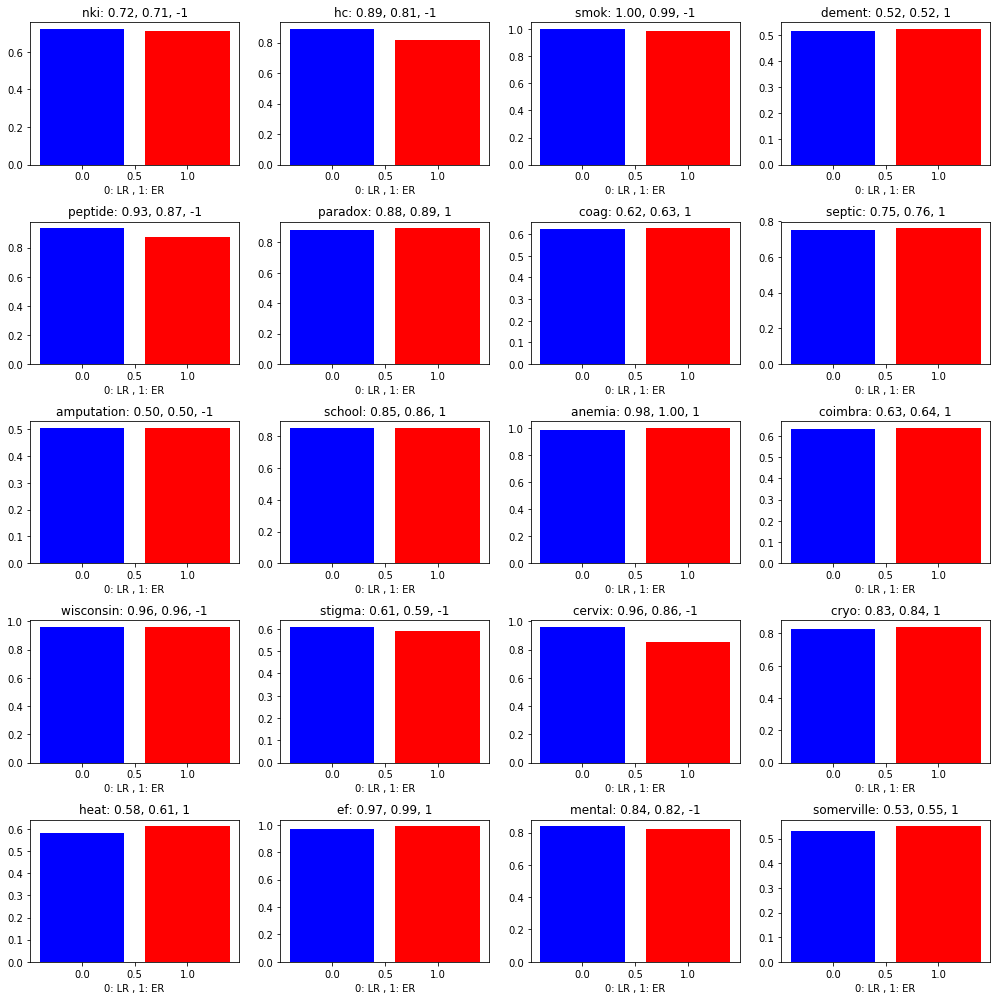

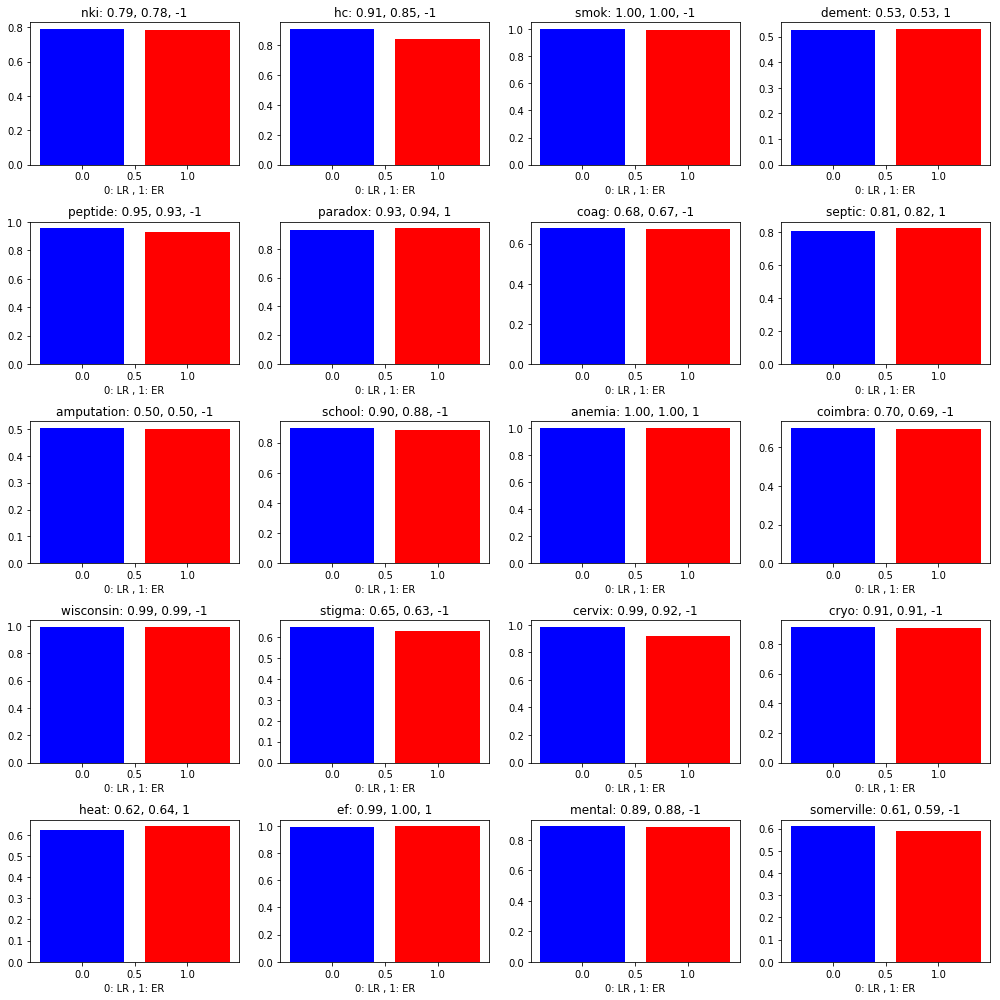

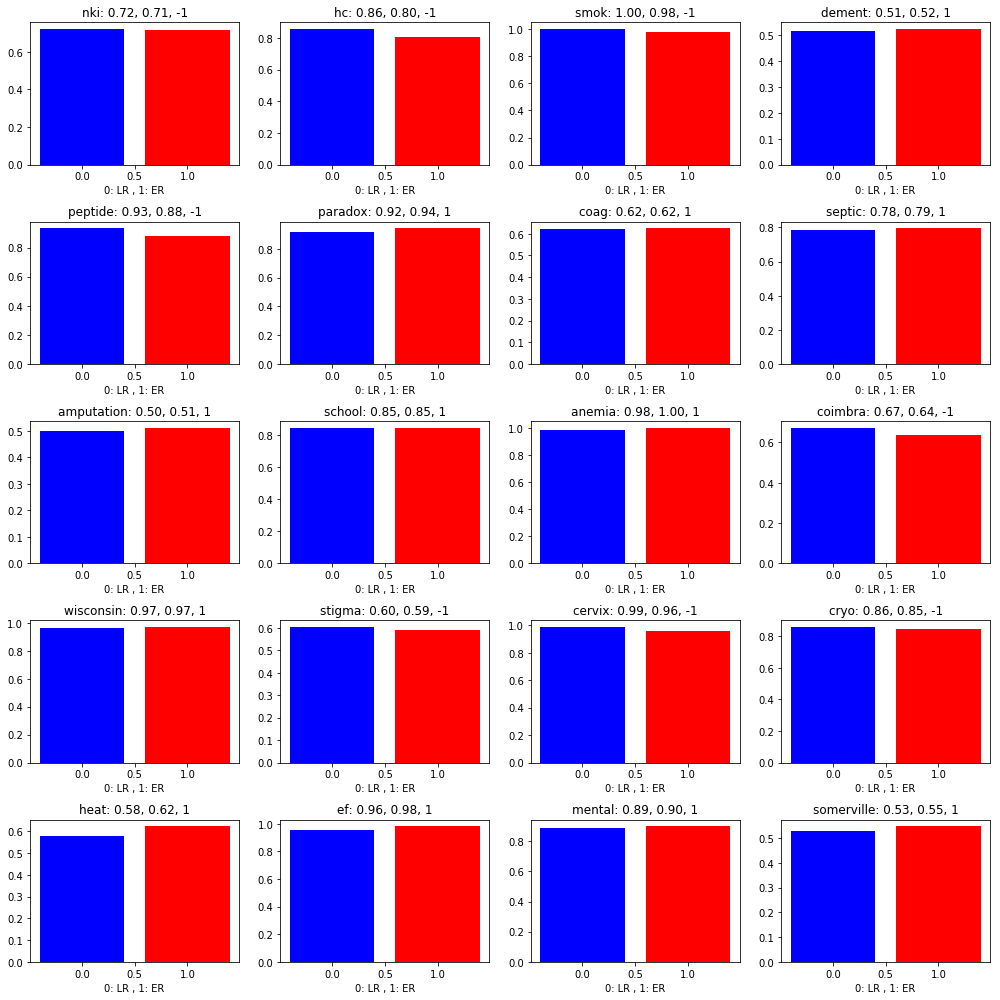

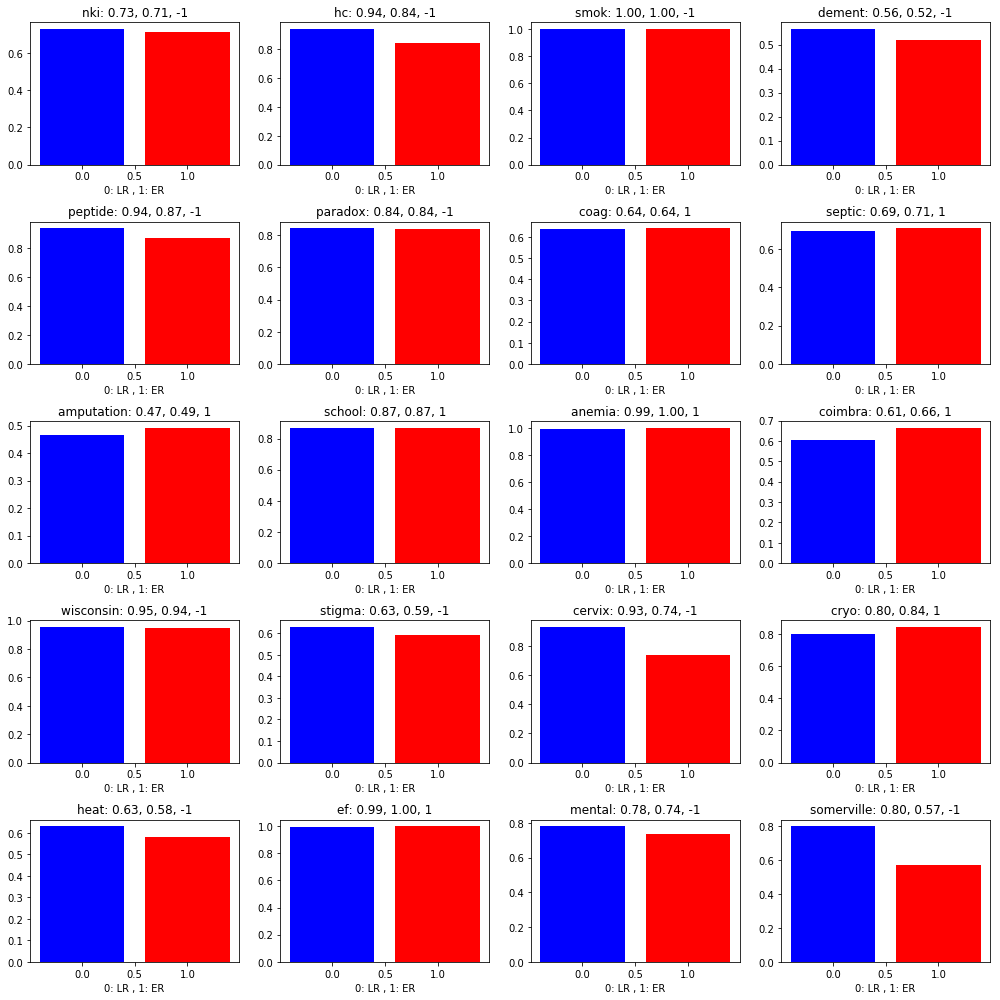

In [5]:
metrics_used = ['accuracy','AUC','precision','recall']
for t,metric in enumerate(metrics_used):
    #print('%s'%metric)
    plot_fig(t)